Random Forest RMSE: 21.4387


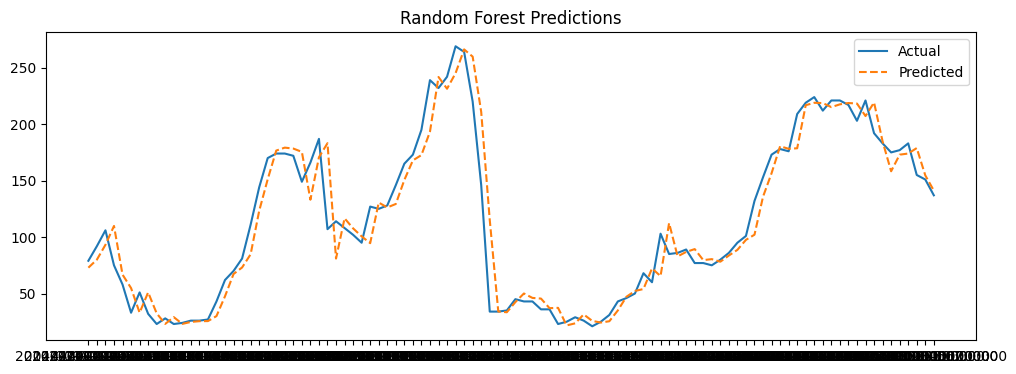

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/pm25_processed.csv", index_col=0)

target = 'pm2.5'
X = df.drop(columns=[target])
y = df[target]

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Random Forest RMSE: {rmse:.4f}")

plt.figure(figsize=(12,4))
plt.plot(y_test.index[:100], y_test[:100], label="Actual")
plt.plot(y_test.index[:100], rf_preds[:100], '--', label="Predicted")
plt.legend()
plt.title("Random Forest Predictions")
plt.show()
